In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
data = pd.read_csv(os.path.join("..","data","pozo.csv"),sep=";")
data['VARIACION_NIVEL'] = (-data['NIVEL DE AGUA (Mts.)']).diff()
data['LLUVIA_ACUM_7D'] = data['LLUVIA CAIDA (mm)'].rolling(window=7).sum()


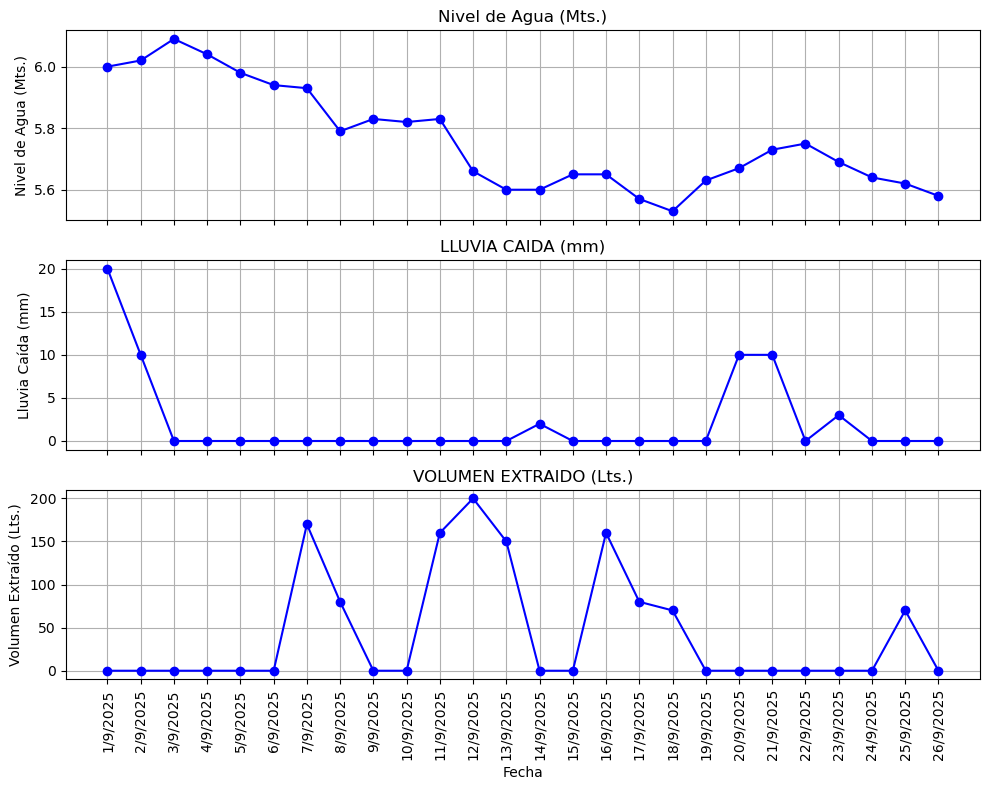

In [33]:
fig, axes = plt.subplots(3,1, figsize=(10, 8), sharex=True)
axes[0].plot(data['FECHA'], 6.5-data['NIVEL DE AGUA (Mts.)'], marker='o', color='b')
axes[0].set_title('Nivel de Agua (Mts.)')
axes[0].set_ylabel('Nivel de Agua (Mts.)')
axes[0].set_xlabel('')
axes[0].set_xticks([])
axes[0].grid()
axes[0].tick_params(axis='x', rotation=90)
axes[1].plot(data['FECHA'], data['LLUVIA CAIDA (mm)'],marker='o', color='b')
axes[1].set_title('LLUVIA CAIDA (mm)')
axes[1].set_xlabel('')
axes[1].set_ylabel('Lluvia Caída (mm)')
axes[0].set_xticks([])
axes[1].set_xticks([])
axes[1].grid()
axes[1].tick_params(axis='x', rotation=90)
plt.xticks(rotation=90)
plt.grid(True)
axes[2].plot(data['FECHA'], data['VOLUMEN EXTRAIDO (Lts.)'], marker='o', color='b')
axes[2].set_title('VOLUMEN EXTRAIDO (Lts.)')
axes[2].set_xlabel('Fecha')
axes[2].set_ylabel('Volumen Extraído (Lts.)')

axes[2].grid()
axes[2].set_xticks(data['FECHA'])
axes[2].set_xticklabels(data['FECHA'], rotation=90)

plt.xticks(rotation=90)
plt.grid(True)
fig.tight_layout()
plt.savefig('time_series_pozo.png', dpi=300)
plt.show()


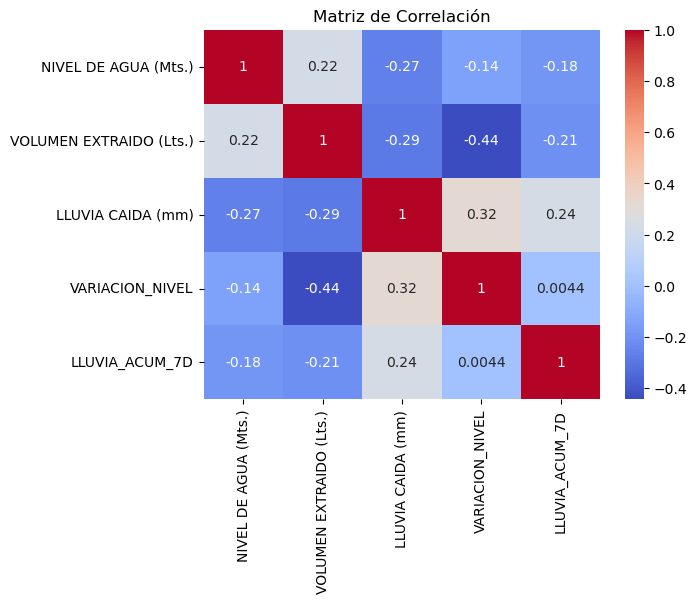

<Figure size 640x480 with 0 Axes>

In [34]:
datosSinFecha = data.drop(columns=['FECHA'])
correlation_matrix = datosSinFecha.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()
plt.savefig('correlation_matrix.png', dpi=300)

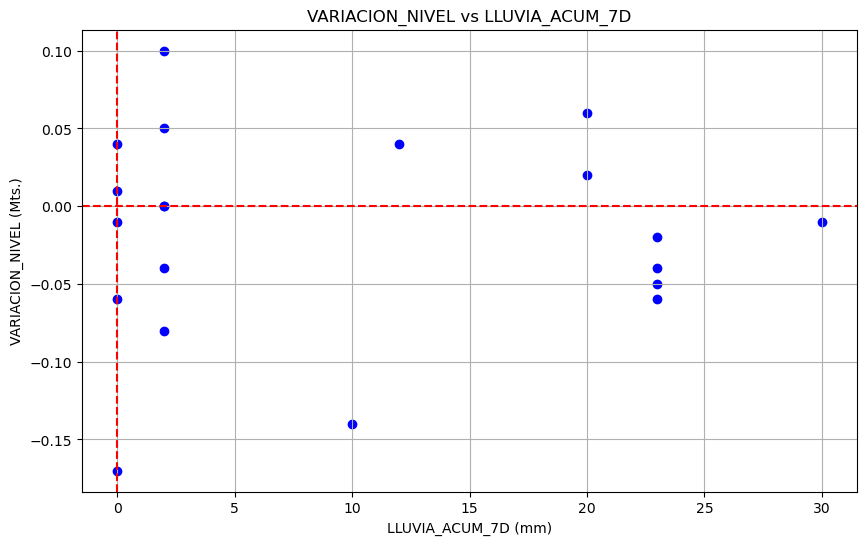

In [35]:
# variacion nivel vs lluvia acumulada 7 dias
plt.figure(figsize=(10, 6))
plt.scatter(data['LLUVIA_ACUM_7D'], data['VARIACION_NIVEL'], color='b')
plt.title('VARIACION_NIVEL vs LLUVIA_ACUM_7D')
plt.xlabel('LLUVIA_ACUM_7D (mm)')
plt.ylabel('VARIACION_NIVEL (Mts.)')
plt.grid(True)
plt.axhline(0, color='r', linestyle='--')
plt.axvline(0, color='r', linestyle='--')
plt.savefig('var_vs_lluvia.png', dpi=300)
plt.show()

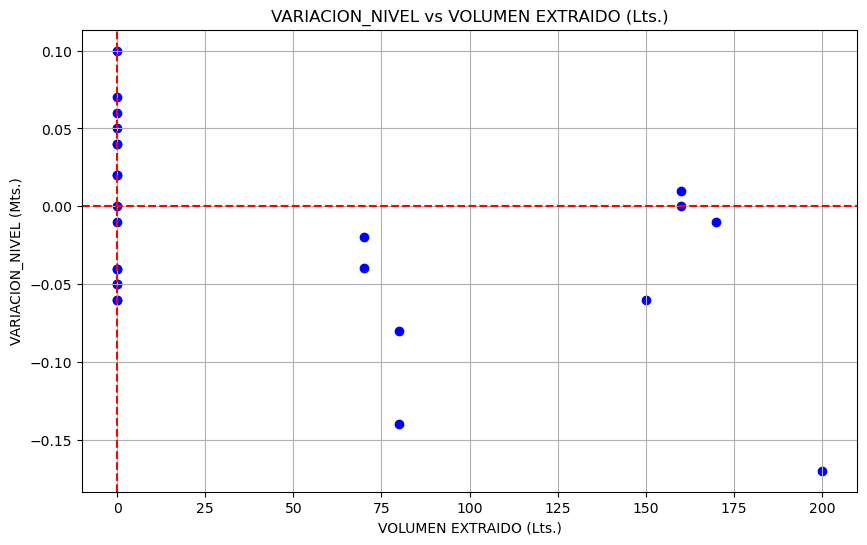

In [36]:
# variacion_nivel vs volumen extraido
plt.figure(figsize=(10, 6))
plt.scatter(data['VOLUMEN EXTRAIDO (Lts.)'], data['VARIACION_NIVEL'], color='b')
plt.title('VARIACION_NIVEL vs VOLUMEN EXTRAIDO (Lts.)')
plt.xlabel('VOLUMEN EXTRAIDO (Lts.)')
plt.ylabel('VARIACION_NIVEL (Mts.)')
plt.grid(True)
plt.axhline(0, color='r', linestyle='--')
plt.axvline(0, color='r', linestyle='--')
plt.savefig('var_vs_vol.png', dpi=300)
plt.show()


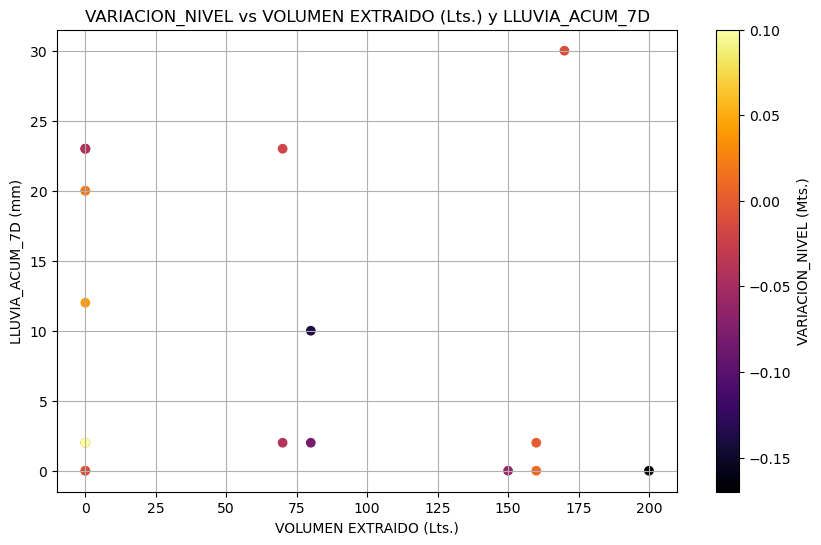

In [37]:
# variacion nivel vs volumen extraido y lluvia acumulada 7 dias 2d
nivel_max, nivel_min = data['VARIACION_NIVEL'].max(), data['VARIACION_NIVEL'].min()
plt.figure(figsize=(10, 6))
plt.scatter(data['VOLUMEN EXTRAIDO (Lts.)'], data['LLUVIA_ACUM_7D'], c=data['VARIACION_NIVEL'], cmap='inferno', vmin=nivel_min, vmax=nivel_max)
plt.colorbar(label='VARIACION_NIVEL (Mts.)')
plt.title('VARIACION_NIVEL vs VOLUMEN EXTRAIDO (Lts.) y LLUVIA_ACUM_7D')
plt.xlabel('VOLUMEN EXTRAIDO (Lts.)')
plt.ylabel('LLUVIA_ACUM_7D (mm)')
plt.grid(True)
plt.savefig('correlation_matrix.png', dpi=300)
plt.show()


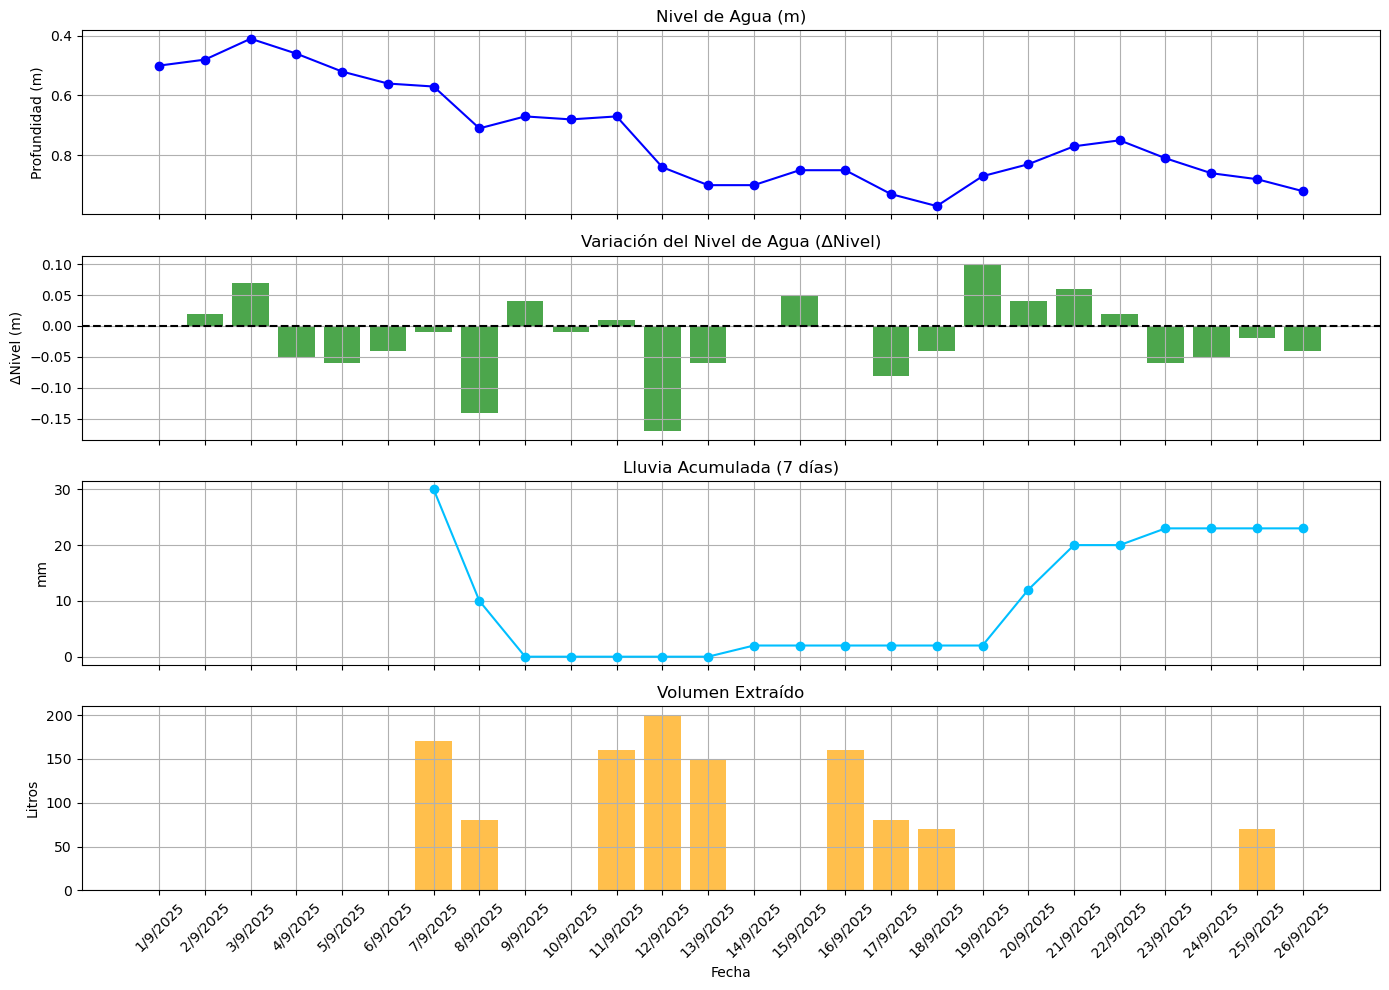

In [38]:
# Dashboard
fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

# 1. Nivel de agua (invertido)
axes[0].plot(data['FECHA'], data['NIVEL DE AGUA (Mts.)'], marker='o', color='blue')
axes[0].invert_yaxis() 
axes[0].set_title('Nivel de Agua (m)')
axes[0].set_ylabel('Profundidad (m)')
axes[0].grid(True)

# 2. Variación de nivel
axes[1].bar(data['FECHA'], data['VARIACION_NIVEL'], color='green', alpha=0.7)
axes[1].axhline(0, color='k', linestyle='--')
axes[1].set_title('Variación del Nivel de Agua (ΔNivel)')
axes[1].set_ylabel('ΔNivel (m)')
axes[1].grid(True)

# 3. Lluvia acumulada 7 días
axes[2].plot(data['FECHA'], data['LLUVIA_ACUM_7D'], marker='o', color='deepskyblue')
axes[2].set_title('Lluvia Acumulada (7 días)')
axes[2].set_ylabel('mm')
axes[2].grid(True)

# 4. Volumen extraído
axes[3].bar(data['FECHA'], data['VOLUMEN EXTRAIDO (Lts.)'], color='orange', alpha=0.7)
axes[3].set_title('Volumen Extraído')
axes[3].set_ylabel('Litros')
axes[3].set_xlabel('Fecha')
axes[3].grid(True)

# Ajustes
plt.xticks(rotation=45)
fig.tight_layout()
plt.savefig('dashboard_pozo.png', dpi=300)
plt.show()